## Programming for Data Analysis Project Notebook 2020 - Killian Foley
### Problem Statement
As a manufacturing engineer at electric motor manufacturing company "Bratwurst Motors" I have been assigned the task of performing a tolerance stackup analysis, on a linear assembly of multiple parts using the Monte Carlo simulation method. The use of tolerancing is very important in the mechanical design process because it affects product quality and manufacturing cost. [1] From Wikipedia [2] Tolerance analysis is described as "the general term given to describe the study of accumulated variation in mechanical parts and assemblies". Tolerance stackup is a process used in mechanical engineering for calculating the effects of the accumulated variation that is allowed by specified dimensions and tolerances provided on manufacturing drawings. Monte Carlo simulation is a computational simulation that relies on repeated random sampling according to a probability distribution to obtain numerical results. [3] 

<br>

The below assembly drawing shows the example application. In order for the Stator and bearing assembly (motor shaft) to fit inside the frame a clearance must be present. That is, the frame is slightly longer than the bearings and stator. The variables will be explained in more detail below.

#### Assembly Drawing
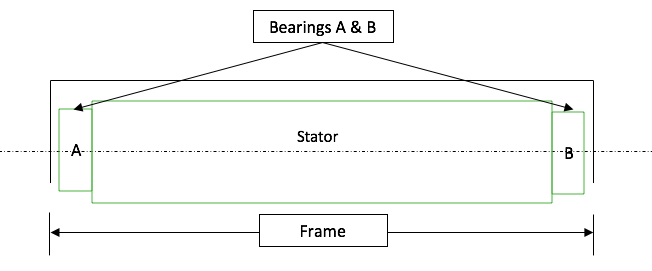

#### Variables Explained
Bearing A = Width (mm) Procured parts with dimensions including tolerances provided by the manufacturer.  
Stator = Length (mm) Manufactured part with tolerance provided by the design engineer according to GD&T standards  
Bearing B = Width (mm) Same as bearing A above  
Frame = Length (mm) Manufactured part with tolerance provided by the design engineer according to GD&T standards  
Clearance Gap = A gap must be present between the frame and the outer bearigns so the motor shaft can fit.  
<br>
In order to create a dataset to perform the analysis the 4 variables (Bearings A&B, Stator and Frame) will have 200 data points simulated according to a normal distribution with the upper and lower tolerance limits being equal to +3$\sigma$ and -3$\sigma$ respectively.  
The gap will then be calculated for each assembly according to the formula  
Clearance Gap = Frame - (Bearing A + Stator + Bearing B)

#### Simulating the Random Variables
First the relevant python packages are imported - Numpy, Pandas, Matplotlib.pyplot, Seaborn. Numpy.random will be used to generate the data. The number of datapoints simulated for each variable will be 200. In order to ensure reproducible data a generator seed is set in Numpy.random.
<br>
As outlined above each of the variables will be according to the normal (Gaussian) distribution. The nominal dimensions and tolerances are as follows
Bearings = 15mm + 0/- 0.120mm
Stator = 180mm +/- 1.6mm
Frame = 212 +/- 1.6mm

In [1]:
#start by importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set Numpy precision to 3 decimal places due to practical measurement accuracies
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

#setting the random generator so results can be reproduced

from numpy.random import default_rng
rg = default_rng(135792468)

#Generating bearing A data using normal distribution
Bearing_width_A = rg.normal(14.96,0.02,200)
Bearing_width_A

array([14.936, 14.981, 14.945, 14.971, 14.943, 14.967, 14.985, 14.996,
       14.96 , 14.945, 14.962, 14.977, 14.987, 14.99 , 14.949, 14.94 ,
       14.933, 14.996, 14.968, 14.93 , 14.94 , 14.961, 14.986, 14.961,
       14.977, 14.937, 14.95 , 14.977, 14.941, 14.959, 14.962, 14.987,
       14.983, 14.97 , 14.945, 14.976, 14.964, 14.948, 14.988, 14.958,
       14.964, 14.974, 14.984, 14.986, 14.964, 14.959, 14.978, 14.952,
       14.948, 14.922, 14.937, 14.965, 14.977, 14.959, 14.992, 14.949,
       14.962, 14.946, 14.944, 15.014, 14.96 , 14.974, 14.941, 14.952,
       14.93 , 14.927, 14.996, 14.974, 14.975, 14.98 , 14.946, 14.986,
       14.961, 14.936, 14.951, 14.939, 14.961, 14.952, 14.921, 14.959,
       14.964, 14.953, 14.993, 14.921, 14.963, 14.986, 14.983, 14.938,
       14.943, 14.947, 14.939, 14.984, 14.991, 14.903, 14.932, 14.947,
       14.948, 14.924, 14.918, 14.971, 14.967, 14.967, 14.946, 14.988,
       14.94 , 14.929, 14.956, 14.968, 14.942, 14.936, 14.933, 14.984,
      

In [2]:
#Generating bearing A data using normal distribution
Bearing_width_B = rg.normal(14.96,0.02,200) #simulate drill diamaters using normal distribution
Bearing_width_B

array([14.978, 14.998, 14.914, 14.95 , 14.937, 14.956, 14.949, 14.958,
       15.003, 14.96 , 14.964, 14.978, 14.956, 14.956, 14.966, 14.952,
       14.979, 14.945, 14.95 , 14.954, 14.957, 14.947, 14.968, 14.966,
       14.973, 14.998, 14.986, 14.953, 14.946, 14.971, 14.978, 14.948,
       14.998, 14.962, 14.962, 14.983, 14.996, 14.971, 14.988, 14.972,
       14.95 , 14.988, 14.95 , 14.942, 14.963, 14.977, 14.961, 14.965,
       14.961, 14.921, 14.966, 14.983, 14.985, 14.976, 14.972, 14.931,
       14.978, 14.962, 14.984, 14.954, 14.952, 14.938, 14.933, 14.946,
       14.971, 14.959, 14.983, 14.964, 14.937, 14.973, 14.975, 14.983,
       14.948, 14.96 , 14.968, 14.965, 14.951, 14.971, 14.959, 14.938,
       14.983, 14.962, 14.96 , 14.981, 14.977, 14.964, 14.97 , 14.981,
       14.958, 14.972, 14.955, 14.955, 14.943, 14.971, 14.961, 14.933,
       14.963, 14.964, 14.95 , 14.927, 14.969, 14.968, 14.951, 14.982,
       14.972, 14.986, 14.931, 14.94 , 14.901, 14.977, 14.954, 14.957,
      

As the manufacturing facilty employs Six Sigma techniques the manufacturing yield will be designed to these parameters that is the upper and lower tolerance limits will be +3 and -3 standard deviations respectively with the distribution centred around the halfway point.  
https://en.wikipedia.org/wiki/Six_Sigma

In [3]:
stator_mu, stator_sigma = 180.0, 0.533 # create variables mean and standard deviation
stator_length = rg.normal(stator_mu, stator_sigma, 200) # simulate hole diameter variable using normal distribution
stator_length

array([179.545, 179.383, 180.365, 179.491, 180.239, 180.873, 179.079,
       180.176, 179.575, 179.714, 179.698, 179.43 , 180.529, 180.606,
       179.819, 180.672, 179.951, 179.449, 181.505, 179.428, 180.4  ,
       180.311, 180.281, 179.729, 180.577, 178.952, 180.223, 180.25 ,
       180.945, 180.396, 179.603, 179.437, 179.634, 179.81 , 180.182,
       180.828, 179.844, 180.895, 179.195, 181.148, 180.326, 180.042,
       180.762, 180.056, 179.328, 180.212, 180.396, 179.783, 179.543,
       179.673, 180.105, 180.146, 180.483, 179.795, 180.354, 179.914,
       180.798, 179.226, 179.531, 180.196, 180.275, 180.721, 180.347,
       179.667, 180.538, 179.284, 180.072, 179.491, 179.655, 179.94 ,
       180.359, 180.23 , 180.068, 179.962, 179.452, 179.525, 179.603,
       179.85 , 180.73 , 179.634, 180.233, 180.392, 180.255, 180.138,
       180.77 , 179.61 , 179.496, 180.443, 180.419, 180.272, 179.477,
       179.967, 179.045, 179.629, 180.116, 180.366, 179.838, 180.055,
       180.667, 179.

Cycles - after consulting the manufacturer and observing similar processes already in production it is estimated that number of cycles will range from 15-30 likely depending on the starting diameter of the drill bit.  
reference: https://www.sandvik.coromant.com/en-us/knowledge/machining-formulas-definitions/pages/drilling.aspx

In [3]:
cycles = rg.integers(15,30,100)
cycles

array([24, 17, 23, 19, 21, 23, 22, 25, 29, 23, 25, 21, 20, 18, 25, 18, 26,
       21, 28, 22, 29, 17, 29, 26, 26, 28, 24, 27, 28, 24, 28, 28, 29, 15,
       17, 24, 18, 27, 26, 16, 23, 15, 22, 17, 25, 15, 24, 29, 22, 15, 25,
       28, 26, 15, 22, 29, 28, 23, 17, 15, 29, 18, 28, 19, 18, 23, 28, 25,
       20, 18, 22, 15, 16, 18, 24, 23, 17, 29, 28, 25, 20, 25, 23, 22, 28,
       17, 29, 25, 23, 17, 21, 23, 26, 15, 15, 19, 22, 15, 15, 28])

As we are implementing Six Sigma techniques we should expect 3.4 defects per million 

In [4]:
outcome = [True, False]
accepted = rg.choice(outcome, 100, p=[0.999999966,3.4E-8])
accepted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Create a Pandas Dataframe from dictionary. [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html].

In [5]:
d = {'DrillDiameter': drill_diameter, 'HoleDiameter': hole_diameter, 'DrillbitCycles': cycles, 'QAAccepted': accepted}
df = pd.DataFrame(data=d)
df

,DrillDiameter,HoleDiameter,DrillbitCycles,QAAccepted
0,6.809,6.802,24,True
1,6.813,6.809,17,True
2,6.805,6.808,23,True
3,6.803,6.808,19,True
4,6.810,6.806,21,True
...,...,...,...,...
95,6.804,6.813,19,True
96,6.813,6.807,22,True
97,6.808,6.810,15,True
98,6.806,6.809,15,True


In [6]:
df.describe() #Outputs a summary of each numerical column

,DrillDiameter,HoleDiameter,DrillbitCycles
count,100.000,100.000,100.000
mean,6.808,6.807,22.420
std,0.004,0.003,4.586
min,6.800,6.802,15.000
25%,6.804,6.806,18.000
50%,6.808,6.807,23.000
75%,6.812,6.809,26.000
max,6.815,6.813,29.000


In [7]:
df.describe(include='all') #Outputs a summary of all columns

,DrillDiameter,HoleDiameter,DrillbitCycles,QAAccepted
count,100.000,100.000,100.000,100
unique,NaN,NaN,NaN,1
top,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,100
mean,6.808,6.807,22.420,NaN
std,0.004,0.003,4.586,NaN
min,6.800,6.802,15.000,NaN
25%,6.804,6.806,18.000,NaN
50%,6.808,6.807,23.000,NaN
75%,6.812,6.809,26.000,NaN


In [9]:
#create a new dataframe excluding QAAccepted column as it is non numeric 
df1 = df[["DrillDiameter", "HoleDiameter", "DrillbitCycles"]]
df1

,DrillDiameter,HoleDiameter,DrillbitCycles
0,6.809,6.802,24
1,6.813,6.809,17
2,6.805,6.808,23
3,6.803,6.808,19
4,6.810,6.806,21
...,...,...,...
95,6.804,6.813,19
96,6.813,6.807,22
97,6.808,6.810,15
98,6.806,6.809,15


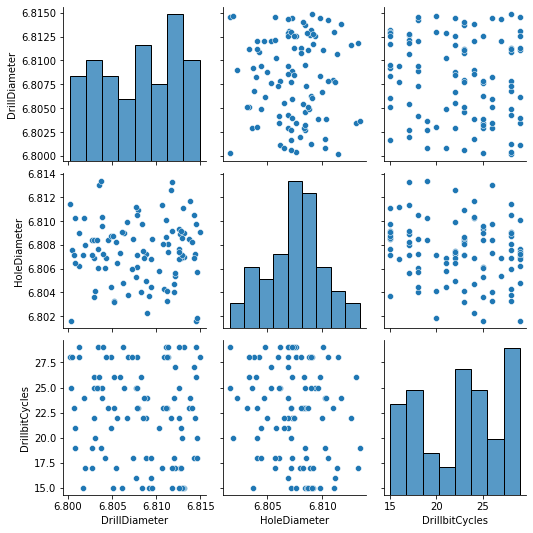

In [10]:
sns.pairplot(df1)

In [ ]:
count, bins, ignored = plt.hist(hole_diameter, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

#### References
[1] Design Society Publication; pdf in repo <br />
[2] Tolerance Analysis wiki; https://en.wikipedia.org/wiki/Tolerance_analysis <br />
[3] Monte Carlo Method wiki; https://en.wikipedia.org/wiki/Monte_Carlo_method <br />




Links
https://www.engineeringtoolbox.com/metric-threads-d_777.html
https://www.engineersedge.com/international_tol.htm
https://www.maford.com/SiteContent/Documents//2018_catalog_sections//MAFord_2018_Master_Catalog_HP_Drill_%20Selection_Chart.pdf